In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

def printHeadline(str):
    display(Markdown(f"## {str}"))


In [3]:
base = "data/"
files = ['pbs', '2mM', '4mM', '6mM', '8mM', '12mM']
labels = ['(G:1,I:min)', '(G:1,I:mid)', '(G:1,I:max)', '(G:2,I:min)', '(G:2,I:mid)', '(G:2,I:max)', '(G:3,I:min)', '(G:3,I:mid)', '(G:3,I:max)']
channels = ["560nm","585nm","610nm","645nm","680nm","705nm","730nm","760nm","810nm","860nm","900nm","940nm"]

def get_data():
    data = {}
    for filename in sorted(os.listdir(base)):
        filepath = base + filename
        filename_without_ext = filename.split('.')[0]
        with open(filepath) as f:
            file_data = {}
            for line in f:
                entries = line.split('#')[:-1]
                for entry in entries:
                    label_last_index = entry.index(")")
                    label, values = entry[:label_last_index + 1], entry[label_last_index + 1:]
                    if label in file_data.keys():
                        file_data[label].append(values.split(",")[:-1])
                    else:
                        file_data[label] = [values.split(",")[:-1]]
                        
            for label in file_data.keys():
                file_data[label] = np.array(file_data[label], dtype=float)
                
            data[filename_without_ext] = file_data
    return data


In [4]:
data = get_data()

for out_key, out_value in data.items():
    for in_key, in_value in out_value.items():
        data[out_key][in_key] = np.mean(data[out_key][in_key], axis=0)
        


## (G:3,I:min)

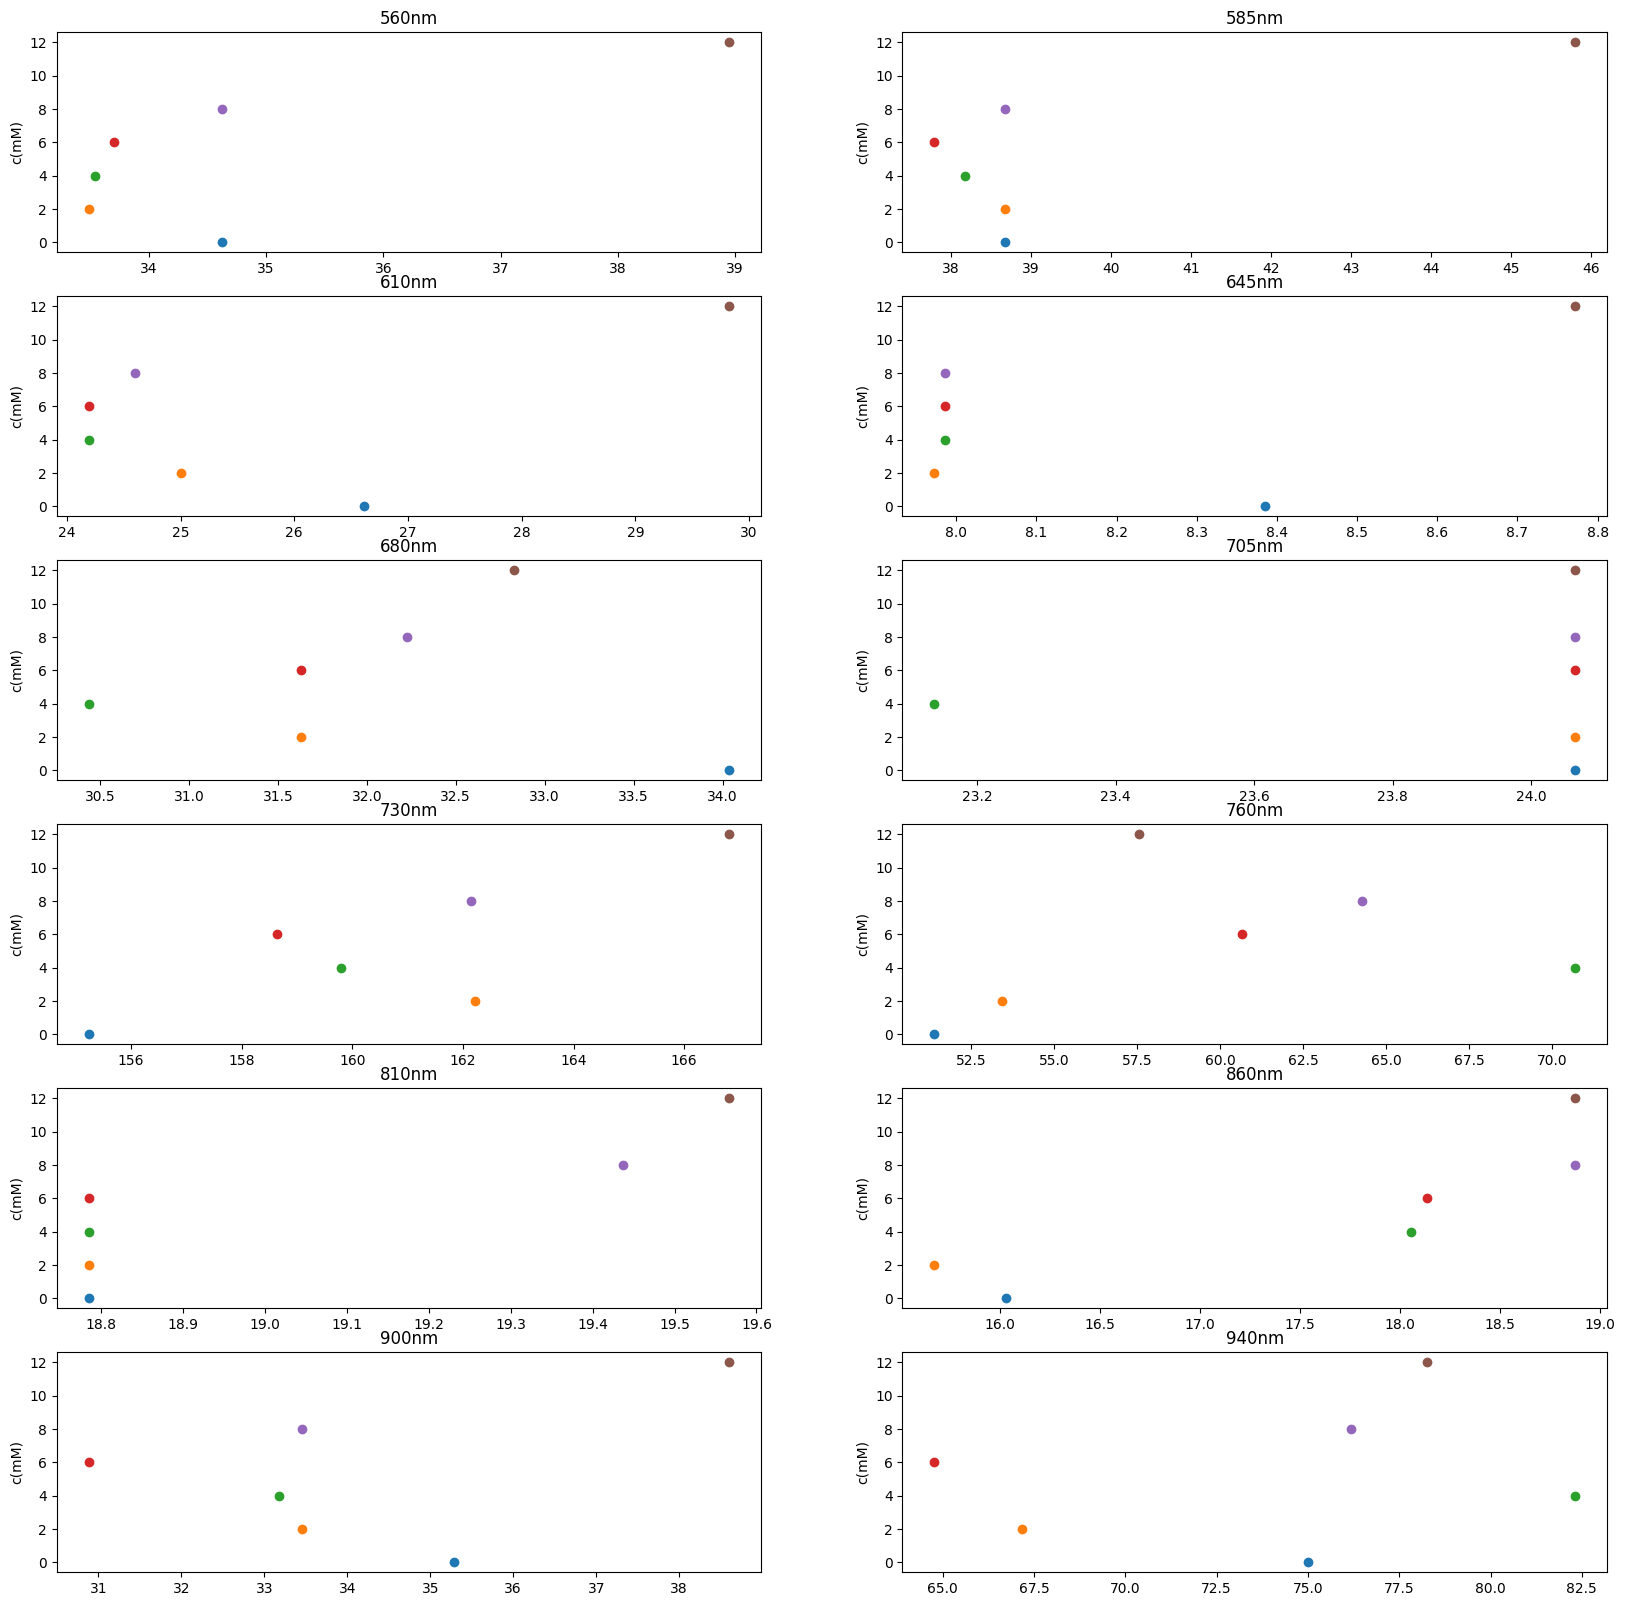

In [14]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

for label in ["(G:3,I:min)"]:
    printHeadline(label)
    plt.figure(figsize=(20, 20))
    for file in files:
        y = 0 if file == "pbs" else int(file.replace("mM", ""))
        # scaled_data = scaler.fit_transform(data[file][label].reshape(-1, 1))
        # for ix, value in enumerate(scaled_data.reshape(1, -1).squeeze()):
        for ix, value in enumerate(data[file][label]):
            plt.subplot(6, 2, ix + 1)
            plt.scatter(value, y)
            plt.title(channels[ix])
            plt.ylabel("c(mM)")
            # plt.xlim([-0.1, 1.1])
    plt.show()


In [35]:
previous_base = "../glucose_measuring/data/"

def get_previous_data():
    data = {}
    for filename in sorted(os.listdir(previous_base)):
        filepath = previous_base + filename
        filename_without_ext = filename.split('.')[0]
        data[filename_without_ext] = np.loadtxt(filepath, delimiter=',')[:, 6:-1]
    return data


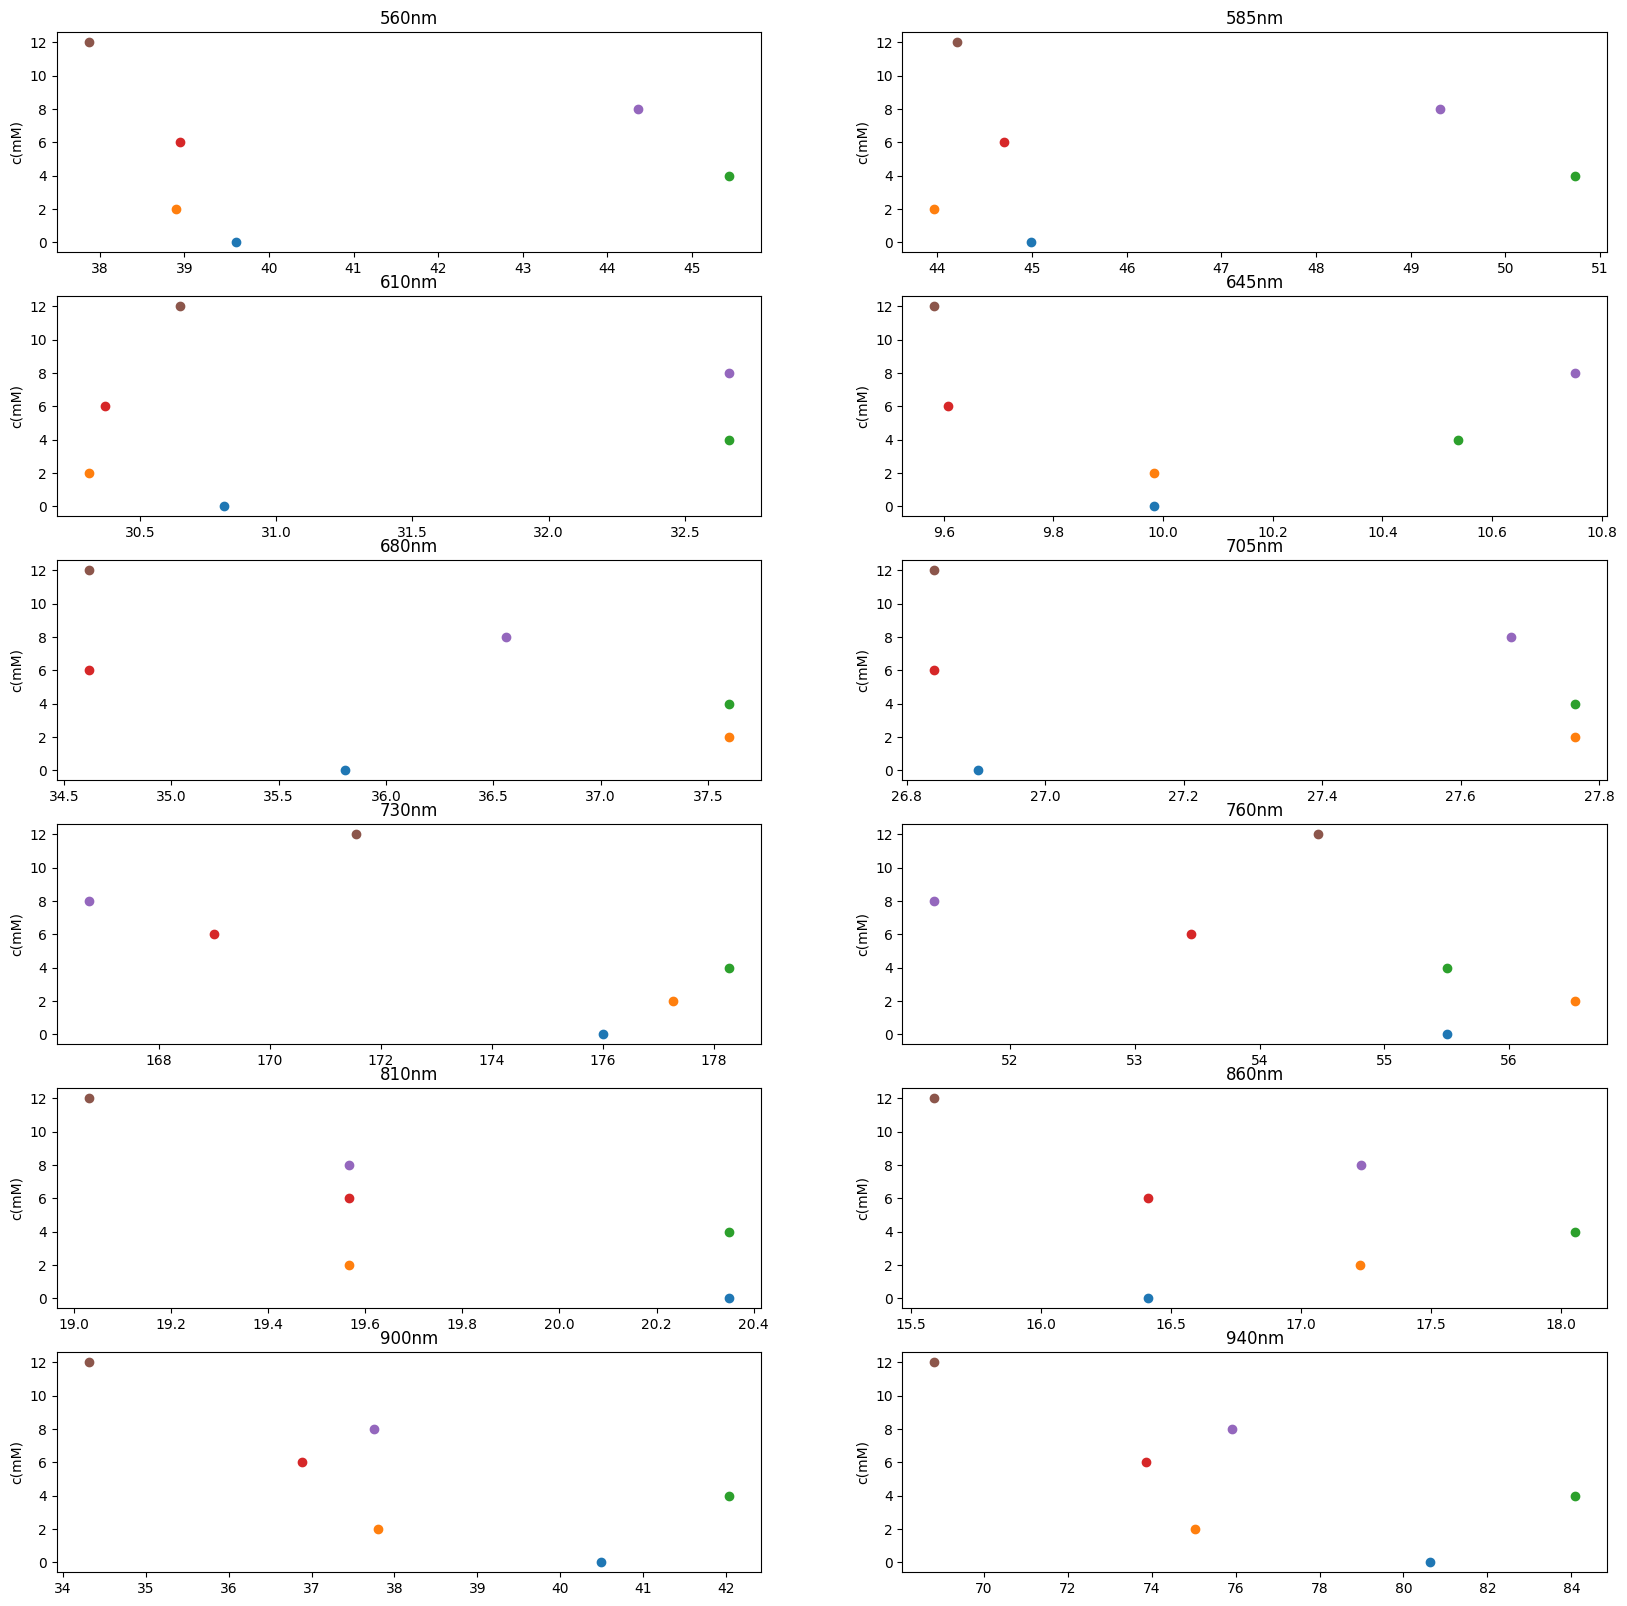

In [38]:
previous_data = get_previous_data()

plt.figure(figsize=(20, 20))
for file in files:
    y = 0 if file == "pbs" else int(file.replace("mM", ""))
    for ix, value in enumerate(np.mean(previous_data[file], axis=0)):
        plt.subplot(6, 2, ix + 1)
        plt.scatter(value, y)
        plt.title(channels[ix])
        plt.ylabel("c(mM)")
plt.show()
